In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Big_sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.694378,0.065684,141.023273,1997.828903
std,4.252967,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.684256,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


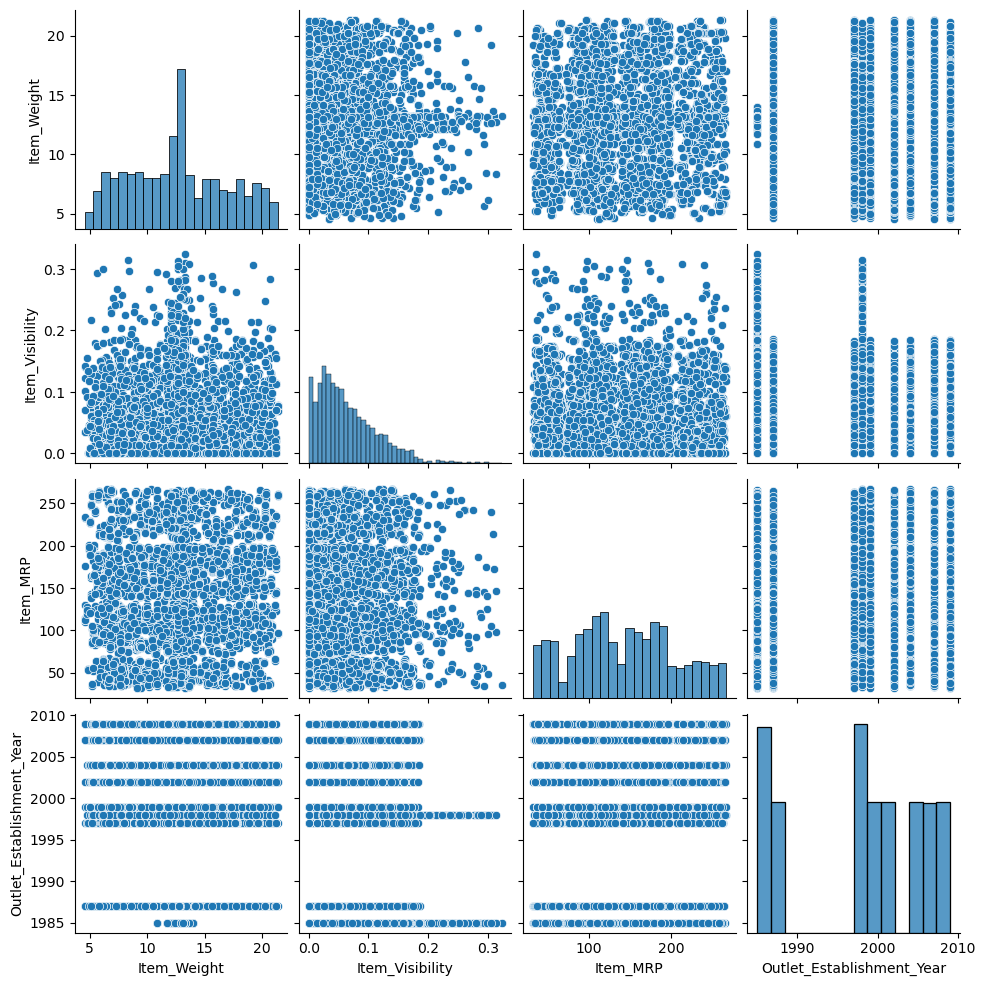

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
df[["Item_Identifier"]].value_counts()

Item_Identifier
DRF48              8
FDK57              8
FDZ50              8
FDN52              8
NCS41              8
                  ..
NCB31              1
FDH33              1
FDB36              1
FDS16              1
FDI14              1
Length: 1543, dtype: int64

In [12]:
df[["Item_Fat_Content"]].value_counts()

Item_Fat_Content
Low Fat             3396
Regular             1935
LF                   206
reg                   78
low fat               66
dtype: int64

In [13]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}}, inplace=True)

In [14]:
df[["Item_Fat_Content"]].value_counts()

Item_Fat_Content
Low Fat             3668
Regular             2013
dtype: int64

In [15]:
df.replace({'Item_Fat_Content':{'Low Fat':0, 'Regular':1}}, inplace=True)

In [16]:
df[['Item_Type']].value_counts()

Item_Type            
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
dtype: int64

In [17]:
df.replace({'Item_type':{'Snack Foods':0,'Fruits and Vegetables':0,'Household':1,'Frozen Foods':0,'Dairy':0,'Baking Goods':0,
'canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Starchy Foods':0,'Others':0,
'Breakfast':0,'Seafood':0}},inplace=True)    


In [18]:
df[["Item_Type"]].value_counts()

Item_Type            
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
dtype: int64

In [19]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               624
OUT013               621
OUT035               620
OUT046               620
OUT049               620
OUT045               619
OUT018               618
OUT017               617
OUT010               370
OUT019               352
dtype: int64

In [20]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT035':2,'OUT046':3,'OUT049':4,'OUT045':5,'OUT018':6,'OUT017':7,'OUT010':8,
'OUT019':9}},inplace = True)

In [21]:
df[["Outlet_Identifier"]].value_counts()

Outlet_Identifier
0                    624
1                    621
2                    620
3                    620
4                    620
5                    619
6                    618
7                    617
8                    370
9                    352
dtype: int64

In [22]:
df[["Outlet_Size"]].value_counts()

Outlet_Size
Medium         1862
Small          1592
High            621
dtype: int64

In [23]:
df.replace({'Outlet_Size':{'Medium':1,'Small':0,'High': 2,}},inplace = True)

In [24]:
df[["Outlet_Size"]].value_counts()

Outlet_Size
1.0            1862
0.0            1592
2.0             621
dtype: int64

In [25]:
df[["Outlet_Location_Type"]].value_counts()

Outlet_Location_Type
Tier 3                  2233
Tier 2                  1856
Tier 1                  1592
dtype: int64

In [26]:
df.replace({'Outlier_Location_Type':{'Tier':2,'Tier 2':1,'Tier 1':0}},inplace = True)

In [27]:
df[["Outlet_Location_Type"]].value_counts()

Outlet_Location_Type
Tier 3                  2233
Tier 2                  1856
Tier 1                  1592
dtype: int64

In [28]:
df[["Outlet_Type"]].value_counts()

Outlet_Type      
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
dtype: int64

In [29]:
df.replace({'Outlier_Type':{'Supermarket Type1':1,'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2}},inplace = True)

In [30]:
df[["Outlet_Type"]].value_counts()

Outlet_Type      
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
dtype: int64

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,0,0.007565,Snack Foods,107.8622,4,1999,1.0,Tier 1,Supermarket Type1
1,FDW14,8.30000,1,0.038428,Dairy,87.3198,7,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,0,0.099575,Others,241.7538,8,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,0,0.015388,Snack Foods,155.0340,7,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.95504,1,0.118599,Dairy,234.2300,0,1985,1.0,Tier 3,Supermarket Type3


In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,0,0.007565,Snack Foods,107.8622,4,1999,1.0,Tier 1,Supermarket Type1
1,FDW14,8.30000,1,0.038428,Dairy,87.3198,7,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,0,0.099575,Others,241.7538,8,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,0,0.015388,Snack Foods,155.0340,7,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.95504,1,0.118599,Dairy,234.2300,0,1985,1.0,Tier 3,Supermarket Type3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   float64
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 488.3+ KB


In [34]:
df.shape

(5681, 11)

In [35]:
y = df['Item_Outlet_Sales']

KeyError: 'Item_Outlet_Sales'

In [ ]:
y.shape

In [ ]:
y

In [ ]:
x = df[[]]

In [ ]:
x.shape

In [ ]:
x

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = standardscaler()

In [ ]:
X_std = df[[]]

In [ ]:
x_std = sc.fit_transform(x_std)

In [ ]:
x_std

In [ ]:
x[[]]=pd.DataFrame(x_std, columns = [[]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.1, random_state=2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import randomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state = 2529)

In [ ]:
rfr.fit(x_train, y_train)

In [ ]:
y_pred = rfr.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squred_error(y_test, y_pred)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()